## **PSO : The Schaffer function2**

In [ ]:
import numpy as np
import random

# ================================
# 1️⃣ Classe Particle (Représente une sélection de sous-ensembles)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets):
        """
        Initialise une particule.
        - num_subsets : Nombre total de sous-ensembles disponibles.
        - k : Nombre de sous-ensembles à choisir.
        - subsets : Liste des sous-ensembles (pour évaluer la couverture).
        """
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets

        # Sélection aléatoire de k sous-ensembles
        self.position = random.sample(range(num_subsets), k)

        # Vitesse : Liste de swaps possibles
        self.velocity = []

        # Meilleure position personnelle
        self.best_position = self.position.copy()
        self.best_score = float('-inf')  # Score initial bas

    def update_velocity(self, global_best_position):
        """
        Met à jour la vitesse sous forme de swaps entre la solution actuelle et Gbest.
        """
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] not in global_best_position:
                swap_candidate = random.choice(global_best_position)
                self.velocity.append((self.position[i], swap_candidate))

    def update_position(self):
        """
        Applique les swaps de la vitesse pour générer une nouvelle position.
        """
        for swap_out, swap_in in self.velocity:
            if swap_out in self.position:
                self.position.remove(swap_out)
                self.position.append(swap_in)

    def fitness(self):
        """
        Fonction de fitness inspirée de la Schaffer Function N.2.
        - Maximisation du nombre d'éléments couverts
        - Contrôle du nombre de sous-ensembles utilisés.
        """
        nb_couvert = len(set().union(*[self.subsets[i] for i in self.position]))
        return (np.sin((nb_couvert ** 2 - self.k ** 2)) ** 2 - 0.5) / (1 + 0.001 * (nb_couvert ** 2 + self.k ** 2)) ** 2

# ================================
# 2️⃣ Classe PSO (Algorithme complet pour MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        """
        Initialise l'algorithme PSO pour MCP.
        - subsets : Liste des sous-ensembles disponibles.
        - universe_size : Nombre total d'éléments dans U.
        - num_particles : Nombre de particules.
        - k : Nombre de sous-ensembles à sélectionner.
        - max_iter : Nombre d'itérations.
        """
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter

        # Initialisation des particules
        self.particles = [Particle(len(subsets), k, subsets) for _ in range(num_particles)]

        # Meilleure solution globale
        self.global_best_position = []
        self.global_best_score = float('-inf')

    def optimize(self):
        """
        Exécute l'optimisation par PSO.
        """
        for iteration in range(self.max_iter):
            for particle in self.particles:
                # Évaluer la fitness actuelle
                score = particle.fitness()

                # Mettre à jour le meilleur personnel (Pbest)
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()

                # Mettre à jour le meilleur global (Gbest)
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            # Mise à jour des vitesses et positions
            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            # Affichage
            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        # Résultat final
        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Nombre maximal d'éléments couverts : {self.global_best_score}")

# ================================
# 3️⃣ Exécution de l'algorithme
# ================================
if __name__ == "__main__":
    # Exemple de problème MCP
    universe_size = 10  # Nombre total d'éléments
    subsets = [
        {0, 1, 2}, {2, 3, 4}, {1, 4, 5}, {5, 6, 7}, {6, 7, 8}, {7, 8, 9}, {0, 3, 6}
    ]
    num_particles = 10  # Nombre de particules
    k = 3  # Sélectionner 3 sous-ensembles
    max_iterations = 20  # Nombre d'itérations

    # Lancement de PSO
    pso = PSO(subsets, universe_size, num_particles, k, max_iterations)
    pso.optimize()


Itération 1/20 - Meilleur score : 0.4338554893148041
Itération 2/20 - Meilleur score : 0.4338554893148041
Itération 3/20 - Meilleur score : 0.4338554893148041
Itération 4/20 - Meilleur score : 0.4338554893148041
Itération 5/20 - Meilleur score : 0.4338554893148041
Itération 6/20 - Meilleur score : 0.4338554893148041
Itération 7/20 - Meilleur score : 0.4338554893148041
Itération 8/20 - Meilleur score : 0.4338554893148041
Itération 9/20 - Meilleur score : 0.4338554893148041
Itération 10/20 - Meilleur score : 0.4338554893148041
Itération 11/20 - Meilleur score : 0.4338554893148041
Itération 12/20 - Meilleur score : 0.4338554893148041
Itération 13/20 - Meilleur score : 0.4338554893148041
Itération 14/20 - Meilleur score : 0.4338554893148041
Itération 15/20 - Meilleur score : 0.4338554893148041
Itération 16/20 - Meilleur score : 0.4338554893148041
Itération 17/20 - Meilleur score : 0.4338554893148041
Itération 18/20 - Meilleur score : 0.4338554893148041
Itération 19/20 - Meilleur score : 0.

In [2]:
import numpy as np
import random
import time  # Pour mesurer le temps d'exécution

# ================================
# 1️⃣ Lecture du fichier SCP (Colab)
# ================================
def load_scp_file(filename):
    """
    Charge un fichier SCP et retourne la liste des sous-ensembles.
    """
    with open(filename, "r") as file:
        lines = file.readlines()

    # Lecture de la première ligne : nombre d'éléments et nombre de sous-ensembles
    num_elements, num_subsets = map(int, lines[0].split())

    # Lire les sous-ensembles
    subsets = [set(map(int, line.strip().split())) for line in lines[1:num_subsets+1]]

    return subsets, num_elements

# ================================
# 2️⃣ Classe Particle (Solution MCP)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets):
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets
        self.position = random.sample(range(num_subsets), k)  # Sélection aléatoire
        self.velocity = []  # Liste des swaps possibles
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

    def update_velocity(self, global_best_position):
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] not in global_best_position:
                swap_candidate = random.choice(global_best_position)
                self.velocity.append((self.position[i], swap_candidate))

    def update_position(self):
        for swap_out, swap_in in self.velocity:
            if swap_out in self.position:
                self.position.remove(swap_out)
                self.position.append(swap_in)

    def fitness(self):
        nb_couvert = len(set().union(*[self.subsets[i] for i in self.position]))
        return (np.sin((nb_couvert ** 2 - self.k ** 2)) ** 2 - 0.5) / (1 + 0.001 * (nb_couvert ** 2 + self.k ** 2)) ** 2

# ================================
# 3️⃣ Classe PSO (Optimisation MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter
        self.particles = [Particle(len(subsets), k, subsets) for _ in range(num_particles)]
        self.global_best_position = []
        self.global_best_score = float('-inf')

    def optimize(self):
        start_time = time.time()  # Début du chronomètre

        for iteration in range(self.max_iter):
            for particle in self.particles:
                score = particle.fitness()
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        end_time = time.time()  # Fin du chronomètre
        execution_time = end_time - start_time

        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Nombre maximal d'éléments couverts : {self.global_best_score}")
        print(f"⏳ Temps d'exécution : {execution_time:.4f} secondes")

# ================================
# 4️⃣ Exécution avec un fichier SCP sur Google Colab
# ================================
if __name__ == "__main__":
    # 🔥 Modifier ici avec le fichier téléchargé (ex: "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scp41.txt" sur Colab)
    filename = "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scp41.txt"  # Assure-toi que le fichier est bien dans /content/

    # Charger les données SCP
    subsets, universe_size = load_scp_file(filename)

    num_particles = 10  # Nombre de particules
    k = 10  # Sélectionner 10 sous-ensembles (ajuster selon l'instance)
    max_iterations = 30  # Nombre d'itérations

    # Lancement de PSO
    pso = PSO(subsets, universe_size, num_particles, k, max_iterations)
    pso.optimize()

Itération 1/30 - Meilleur score : 0.0406009459635665
Itération 2/30 - Meilleur score : 0.06691921809915984
Itération 3/30 - Meilleur score : 0.13414754322840308
Itération 4/30 - Meilleur score : 0.3569464328900088
Itération 5/30 - Meilleur score : 0.3569464328900088
Itération 6/30 - Meilleur score : 0.3569464328900088
Itération 7/30 - Meilleur score : 0.3569464328900088
Itération 8/30 - Meilleur score : 0.3569464328900088
Itération 9/30 - Meilleur score : 0.3569464328900088
Itération 10/30 - Meilleur score : 0.3569464328900088
Itération 11/30 - Meilleur score : 0.3569464328900088
Itération 12/30 - Meilleur score : 0.3569464328900088
Itération 13/30 - Meilleur score : 0.3569464328900088
Itération 14/30 - Meilleur score : 0.3569464328900088
Itération 15/30 - Meilleur score : 0.3569464328900088
Itération 16/30 - Meilleur score : 0.3569464328900088
Itération 17/30 - Meilleur score : 0.3569464328900088
Itération 18/30 - Meilleur score : 0.3569464328900088
Itération 19/30 - Meilleur score : 

In [3]:
import numpy as np
import random
import time  # Pour mesurer le temps d'exécution

# ================================
# 1️⃣ Lecture du fichier SCP (Colab)
# ================================
def load_scp_file(filename):
    """
    Charge un fichier SCP et retourne la liste des sous-ensembles.
    """
    with open(filename, "r") as file:
        lines = file.readlines()

    # Lecture de la première ligne : nombre d'éléments et nombre de sous-ensembles
    num_elements, num_subsets = map(int, lines[0].split())

    # Lire les sous-ensembles
    subsets = [set(map(int, line.strip().split())) for line in lines[1:num_subsets+1]]

    return subsets, num_elements

# ================================
# 2️⃣ Classe Particle (Solution MCP)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets):
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets
        self.position = random.sample(range(num_subsets), k)  # Sélection aléatoire
        self.velocity = []  # Liste des swaps possibles
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

    def update_velocity(self, global_best_position):
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] not in global_best_position:
                swap_candidate = random.choice(global_best_position)
                self.velocity.append((self.position[i], swap_candidate))

    def update_position(self):
        for swap_out, swap_in in self.velocity:
            if swap_out in self.position:
                self.position.remove(swap_out)
                self.position.append(swap_in)

    def fitness(self):
        nb_couvert = len(set().union(*[self.subsets[i] for i in self.position]))
        return (np.sin((nb_couvert ** 2 - self.k ** 2)) ** 2 - 0.5) / (1 + 0.001 * (nb_couvert ** 2 + self.k ** 2)) ** 2

# ================================
# 3️⃣ Classe PSO (Optimisation MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter
        self.particles = [Particle(len(subsets), k, subsets) for _ in range(num_particles)]
        self.global_best_position = []
        self.global_best_score = float('-inf')

    def optimize(self):
        start_time = time.time()  # Début du chronomètre

        for iteration in range(self.max_iter):
            for particle in self.particles:
                score = particle.fitness()
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        end_time = time.time()  # Fin du chronomètre
        execution_time = end_time - start_time

        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Nombre maximal d'éléments couverts : {self.global_best_score}")
        print(f"⏳ Temps d'exécution : {execution_time:.4f} secondes")

# ================================
# 4️⃣ Exécution avec un fichier SCP sur Google Colab
# ================================
if __name__ == "__main__":
    # 🔥 Modifier ici avec le fichier téléchargé (ex: "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scp41.txt" sur Colab)
    filename = "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scp62.txt"  # Assure-toi que le fichier est bien dans /content/

    # Charger les données SCP
    subsets, universe_size = load_scp_file(filename)

    num_particles = 10  # Nombre de particules
    k = 10  # Sélectionner 10 sous-ensembles (ajuster selon l'instance)
    max_iterations = 30  # Nombre d'itérations

    # Lancement de PSO
    pso = PSO(subsets, universe_size, num_particles, k, max_iterations)
    pso.optimize()

Itération 1/30 - Meilleur score : 0.00640670709745044
Itération 2/30 - Meilleur score : 0.06691921809915984
Itération 3/30 - Meilleur score : 0.06691921809915984
Itération 4/30 - Meilleur score : 0.06691921809915984
Itération 5/30 - Meilleur score : 0.06691921809915984
Itération 6/30 - Meilleur score : 0.06691921809915984
Itération 7/30 - Meilleur score : 0.06691921809915984
Itération 8/30 - Meilleur score : 0.06691921809915984
Itération 9/30 - Meilleur score : 0.06691921809915984
Itération 10/30 - Meilleur score : 0.06691921809915984
Itération 11/30 - Meilleur score : 0.06691921809915984
Itération 12/30 - Meilleur score : 0.06691921809915984
Itération 13/30 - Meilleur score : 0.06691921809915984
Itération 14/30 - Meilleur score : 0.06691921809915984
Itération 15/30 - Meilleur score : 0.06691921809915984
Itération 16/30 - Meilleur score : 0.06691921809915984
Itération 17/30 - Meilleur score : 0.06691921809915984
Itération 18/30 - Meilleur score : 0.06691921809915984
Itération 19/30 - M

In [5]:
import numpy as np
import random
import time  # Pour mesurer le temps d'exécution

# ================================
# 1️⃣ Lecture du fichier SCP (Colab)
# ================================
def load_scp_file(filename):
    """
    Charge un fichier SCP et retourne la liste des sous-ensembles.
    """
    with open(filename, "r") as file:
        lines = file.readlines()

    # Lecture de la première ligne : nombre d'éléments et nombre de sous-ensembles
    num_elements, num_subsets = map(int, lines[0].split())

    # Lire les sous-ensembles
    subsets = [set(map(int, line.strip().split())) for line in lines[1:num_subsets+1]]

    return subsets, num_elements

# ================================
# 2️⃣ Classe Particle (Solution MCP)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets):
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets
        self.position = random.sample(range(num_subsets), k)  # Sélection aléatoire
        self.velocity = []  # Liste des swaps possibles
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

    def update_velocity(self, global_best_position):
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] not in global_best_position:
                swap_candidate = random.choice(global_best_position)
                self.velocity.append((self.position[i], swap_candidate))

    def update_position(self):
        for swap_out, swap_in in self.velocity:
            if swap_out in self.position:
                self.position.remove(swap_out)
                self.position.append(swap_in)

    def fitness(self):
        nb_couvert = len(set().union(*[self.subsets[i] for i in self.position]))
        return (np.sin((nb_couvert ** 2 - self.k ** 2)) ** 2 - 0.5) / (1 + 0.001 * (nb_couvert ** 2 + self.k ** 2)) ** 2

# ================================
# 3️⃣ Classe PSO (Optimisation MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter
        self.particles = [Particle(len(subsets), k, subsets) for _ in range(num_particles)]
        self.global_best_position = []
        self.global_best_score = float('-inf')

    def optimize(self):
        start_time = time.time()  # Début du chronomètre

        for iteration in range(self.max_iter):
            for particle in self.particles:
                score = particle.fitness()
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        end_time = time.time()  # Fin du chronomètre
        execution_time = end_time - start_time

        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Nombre maximal d'éléments couverts : {self.global_best_score}")
        print(f"⏳ Temps d'exécution : {execution_time:.4f} secondes")

# ================================
# 4️⃣ Exécution avec un fichier SCP sur Google Colab
# ================================
if __name__ == "__main__":
    # 🔥 Modifier ici avec le fichier téléchargé (ex: "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scp41.txt" sur Colab)
    filename = "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scpclr13.txt"  # Assure-toi que le fichier est bien dans /content/

    # Charger les données SCP
    subsets, universe_size = load_scp_file(filename)

    num_particles = 10  # Nombre de particules
    k = 10  # Sélectionner 10 sous-ensembles (ajuster selon l'instance)
    max_iterations = 30  # Nombre d'itérations

    # Lancement de PSO
    pso = PSO(subsets, universe_size, num_particles, k, max_iterations)
    pso.optimize()

Itération 1/30 - Meilleur score : 0.00640670709745044
Itération 2/30 - Meilleur score : 0.017396393585668354
Itération 3/30 - Meilleur score : 0.0406009459635665
Itération 4/30 - Meilleur score : 0.0406009459635665
Itération 5/30 - Meilleur score : 0.0406009459635665
Itération 6/30 - Meilleur score : 0.0406009459635665
Itération 7/30 - Meilleur score : 0.0406009459635665
Itération 8/30 - Meilleur score : 0.0406009459635665
Itération 9/30 - Meilleur score : 0.0406009459635665
Itération 10/30 - Meilleur score : 0.0406009459635665
Itération 11/30 - Meilleur score : 0.0406009459635665
Itération 12/30 - Meilleur score : 0.0406009459635665
Itération 13/30 - Meilleur score : 0.0406009459635665
Itération 14/30 - Meilleur score : 0.0406009459635665
Itération 15/30 - Meilleur score : 0.0406009459635665
Itération 16/30 - Meilleur score : 0.0406009459635665
Itération 17/30 - Meilleur score : 0.0406009459635665
Itération 18/30 - Meilleur score : 0.0406009459635665
Itération 19/30 - Meilleur score :

#PSO : Balanced Coverage Function


In [6]:
import numpy as np
import random
import time  # Pour mesurer le temps d'exécution

# ================================
# 1️⃣ Lecture du fichier SCP (Colab)
# ================================
def load_scp_file(filename):
    """
    Charge un fichier SCP et retourne la liste des sous-ensembles.
    """
    with open(filename, "r") as file:
        lines = file.readlines()

    # Lecture de la première ligne : nombre d'éléments et nombre de sous-ensembles
    num_elements, num_subsets = map(int, lines[0].split())

    # Lire les sous-ensembles
    subsets = [set(map(int, line.strip().split())) for line in lines[1:num_subsets+1]]

    return subsets, num_elements

# ================================
# 2️⃣ Classe Particle (Solution MCP)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets, universe_size):
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets
        self.universe_size = universe_size  # Nombre total d'éléments
        self.position = random.sample(range(num_subsets), k)  # Sélection aléatoire
        self.velocity = []  # Liste des swaps possibles
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

    def update_velocity(self, global_best_position):
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] not in global_best_position:
                swap_candidate = random.choice(global_best_position)
                self.velocity.append((self.position[i], swap_candidate))

    def update_position(self):
        for swap_out, swap_in in self.velocity:
            if swap_out in self.position:
                self.position.remove(swap_out)
                self.position.append(swap_in)

    def fitness(self):
        """
        Nouvelle fonction de fitness : Balanced Coverage
        - Favorise la couverture maximale
        - Pénalise la redondance
        """
        covered_elements = []
        element_count = {}  # Dictionnaire pour compter les occurrences des éléments

        # Récupérer tous les éléments couverts et compter les doublons
        for subset_index in self.position:
            for elem in self.subsets[subset_index]:
                covered_elements.append(elem)
                element_count[elem] = element_count.get(elem, 0) + 1

        nb_couvert = len(set(covered_elements))  # Nombre d'éléments couverts uniques
        total_elements = self.universe_size  # Nombre total d’éléments dans U
        doublons = sum(count - 1 for count in element_count.values() if count > 1)  # Éléments couverts plusieurs fois

        alpha = 0.3  # Facteur de pénalité des doublons (ajuster si nécessaire)

        # Calcul de la fitness
        fitness_value = (nb_couvert / total_elements) - alpha * (doublons / nb_couvert if nb_couvert > 0 else 0)

        return fitness_value

# ================================
# 3️⃣ Classe PSO (Optimisation MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter
        self.particles = [Particle(len(subsets), k, subsets, universe_size) for _ in range(num_particles)]
        self.global_best_position = []
        self.global_best_score = float('-inf')

    def optimize(self):
        start_time = time.time()  # Début du chronomètre

        for iteration in range(self.max_iter):
            for particle in self.particles:
                score = particle.fitness()
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        end_time = time.time()  # Fin du chronomètre
        execution_time = end_time - start_time

        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Nombre maximal d'éléments couverts : {self.global_best_score}")
        print(f"⏳ Temps d'exécution : {execution_time:.4f} secondes")

# ================================
# 4️⃣ Exécution avec un fichier SCP sur Google Colab
# ================================
if __name__ == "__main__":
    # 🔥 Modifier ici avec le fichier téléchargé (ex: "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scp41.txt" sur Colab)
    filename = "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scpclr13.txt"  # Assure-toi que le fichier est bien dans /content/

    # Charger les données SCP
    subsets, universe_size = load_scp_file(filename)

    num_particles = 10  # Nombre de particules
    k = 10  # Sélectionner 10 sous-ensembles (ajuster selon l'instance)
    max_iterations = 30  # Nombre d'itérations

    # Lancement de PSO
    pso = PSO(subsets, universe_size, num_particles, k, max_iterations)
    pso.optimize()


Itération 1/30 - Meilleur score : 0.023595848595848595
Itération 2/30 - Meilleur score : 0.023595848595848595
Itération 3/30 - Meilleur score : 0.023595848595848595
Itération 4/30 - Meilleur score : 0.023595848595848595
Itération 5/30 - Meilleur score : 0.023595848595848595
Itération 6/30 - Meilleur score : 0.023595848595848595
Itération 7/30 - Meilleur score : 0.023595848595848595
Itération 8/30 - Meilleur score : 0.023595848595848595
Itération 9/30 - Meilleur score : 0.023595848595848595
Itération 10/30 - Meilleur score : 0.023595848595848595
Itération 11/30 - Meilleur score : 0.023595848595848595
Itération 12/30 - Meilleur score : 0.023595848595848595
Itération 13/30 - Meilleur score : 0.023595848595848595
Itération 14/30 - Meilleur score : 0.023595848595848595
Itération 15/30 - Meilleur score : 0.023595848595848595
Itération 16/30 - Meilleur score : 0.023595848595848595
Itération 17/30 - Meilleur score : 0.023595848595848595
Itération 18/30 - Meilleur score : 0.023595848595848595
I

# PSO : SOMME

In [7]:
import numpy as np
import random
import time  # Pour mesurer le temps d'exécution

# ================================
# 1️⃣ Lecture du fichier SCP (Colab)
# ================================
def load_scp_file(filename):
    """
    Charge un fichier SCP et retourne la liste des sous-ensembles.
    """
    with open(filename, "r") as file:
        lines = file.readlines()

    # Lecture de la première ligne : nombre d'éléments et nombre de sous-ensembles
    num_elements, num_subsets = map(int, lines[0].split())

    # Lire les sous-ensembles
    subsets = [set(map(int, line.strip().split())) for line in lines[1:num_subsets+1]]

    return subsets, num_elements

# ================================
# 2️⃣ Classe Particle (Solution MCP)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets):
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets
        self.position = random.sample(range(num_subsets), k)  # Sélection aléatoire
        self.velocity = []  # Liste des swaps possibles
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

    def update_velocity(self, global_best_position):
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] not in global_best_position:
                swap_candidate = random.choice(global_best_position)
                self.velocity.append((self.position[i], swap_candidate))

    def update_position(self):
        for swap_out, swap_in in self.velocity:
            if swap_out in self.position:
                self.position.remove(swap_out)
                self.position.append(swap_in)

    def fitness(self):
        """
        Nouvelle fonction de fitness basée sur la somme des tailles des sous-ensembles.
        - Plus la somme est grande, plus la solution est considérée comme bonne.
        """
        total_sum = sum(len(self.subsets[i]) for i in self.position)
        return total_sum  # Objectif : maximiser cette valeur

# ================================
# 3️⃣ Classe PSO (Optimisation MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter
        self.particles = [Particle(len(subsets), k, subsets) for _ in range(num_particles)]
        self.global_best_position = []
        self.global_best_score = float('-inf')

    def optimize(self):
        start_time = time.time()  # Début du chronomètre

        for iteration in range(self.max_iter):
            for particle in self.particles:
                score = particle.fitness()
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        end_time = time.time()  # Fin du chronomètre
        execution_time = end_time - start_time

        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Score final (somme des tailles des sous-ensembles) : {self.global_best_score}")
        print(f"⏳ Temps d'exécution : {execution_time:.4f} secondes")

# ================================
# 4️⃣ Exécution avec un fichier SCP sur Google Colab
# ================================
if __name__ == "__main__":
    # 🔥 Modifier ici avec le fichier téléchargé (ex: "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scp41.txt" sur Colab)
    filename = "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scpclr13.txt"  # Assure-toi que le fichier est bien dans /content/

    # Charger les données SCP
    subsets, universe_size = load_scp_file(filename)

    num_particles = 10  # Nombre de particules
    k = 10  # Sélectionner 10 sous-ensembles (ajuster selon l'instance)
    max_iterations = 30  # Nombre d'itérations

    # Lancement de PSO
    pso = PSO(subsets, universe_size, num_particles, k, max_iterations)
    pso.optimize()


Itération 1/30 - Meilleur score : 120
Itération 2/30 - Meilleur score : 120
Itération 3/30 - Meilleur score : 120
Itération 4/30 - Meilleur score : 120
Itération 5/30 - Meilleur score : 120
Itération 6/30 - Meilleur score : 120
Itération 7/30 - Meilleur score : 120
Itération 8/30 - Meilleur score : 120
Itération 9/30 - Meilleur score : 120
Itération 10/30 - Meilleur score : 120
Itération 11/30 - Meilleur score : 120
Itération 12/30 - Meilleur score : 120
Itération 13/30 - Meilleur score : 120
Itération 14/30 - Meilleur score : 120
Itération 15/30 - Meilleur score : 120
Itération 16/30 - Meilleur score : 120
Itération 17/30 - Meilleur score : 120
Itération 18/30 - Meilleur score : 120
Itération 19/30 - Meilleur score : 120
Itération 20/30 - Meilleur score : 120
Itération 21/30 - Meilleur score : 120
Itération 22/30 - Meilleur score : 120
Itération 23/30 - Meilleur score : 120
Itération 24/30 - Meilleur score : 120
Itération 25/30 - Meilleur score : 120
Itération 26/30 - Meilleur score :

code GA ta3 git ---> PSO : expliquer f doc


In [8]:
import numpy as np
import random
import time  # Pour mesurer le temps d'exécution

# ================================
# 1️⃣ Lecture du fichier SCP
# ================================
def load_scp_file(filename):
    """
    Charge un fichier SCP et retourne la liste des sous-ensembles.
    """
    with open(filename, "r") as file:
        lines = file.readlines()

    # Lecture de la première ligne : nombre d'éléments et nombre de sous-ensembles
    num_elements, num_subsets = map(int, lines[0].split())

    # Lire les sous-ensembles
    subsets = [set(map(int, line.strip().split())) for line in lines[1:num_subsets+1]]

    return subsets, num_elements

# ================================
# 2️⃣ Classe Particle (Solution MCP)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets):
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets
        self.position = self.initialisation_solution()  # Sélection aléatoire
        self.velocity = []  # Liste des swaps possibles
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

    def initialisation_solution(self):
        """
        Initialise une solution en sélectionnant exactement k sous-ensembles.
        """
        solution = [0] * self.num_subsets  # Initialiser un vecteur binaire
        indices = random.sample(range(self.num_subsets), self.k)  # Sélection aléatoire
        for index in indices:
            solution[index] = 1  # Activer les indices choisis
        return solution

    def update_velocity(self, global_best_position):
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] != global_best_position[i]:  # Si la position diffère
                self.velocity.append(i)  # Ajouter l'indice à changer

    def update_position(self):
        for index in self.velocity:
            self.position[index] = 1 - self.position[index]  # Inversion 0 <-> 1

        # Ajuster pour respecter la contrainte de k sous-ensembles
        while sum(self.position) > self.k:
            indices_1 = [i for i in range(len(self.position)) if self.position[i] == 1]
            self.position[random.choice(indices_1)] = 0  # Désactiver aléatoirement un 1

        while sum(self.position) < self.k:
            indices_0 = [i for i in range(len(self.position)) if self.position[i] == 0]
            self.position[random.choice(indices_0)] = 1  # Activer aléatoirement un 0

    def fitness(self):
        """
        Fonction de fitness : Maximisation du nombre d'éléments couverts.
        """
        covered_elements = set()
        for i, selected in enumerate(self.position):
            if selected == 1:
                covered_elements.update(self.subsets[i])  # Ajouter le sous-ensemble
        return len(covered_elements)  # Retourne le nombre total d'éléments couverts

# ================================
# 3️⃣ Classe PSO (Optimisation MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter
        self.particles = [Particle(len(subsets), k, subsets) for _ in range(num_particles)]
        self.global_best_position = None
        self.global_best_score = float('-inf')

    def optimize(self):
        start_time = time.time()  # Début du chronomètre
        fitness_historique = []  # Stocker l'évolution du fitness

        for iteration in range(self.max_iter):
            for particle in self.particles:
                score = particle.fitness()
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            fitness_historique.append(self.global_best_score)
            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        end_time = time.time()  # Fin du chronomètre
        execution_time = end_time - start_time

        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Score final (éléments couverts) : {self.global_best_score}")
        print(f"⏳ Temps d'exécution : {execution_time:.4f} secondes")

        return self.global_best_position, fitness_historique, execution_time

# ================================
# 4️⃣ Exécution et Expérimentation (100 tests)
# ================================
if __name__ == "__main__":
    filename = "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scpclr13.txt"

    # Charger les données SCP
    subsets, universe_size = load_scp_file(filename)

    num_particles = 50  # Nombre de particules
    k = int((2/3) * len(subsets))  # k = 2/3 du nombre de sous-ensembles
    max_iterations = 50  # Nombre d'itérations

    # Expérimentation sur 100 exécutions
    n_experiments = 100
    fitness_results = []
    execution_times = []

    for i in range(n_experiments):
        print(f"Exécution {i+1} / {n_experiments}")

        pso = PSO(subsets=subsets, universe_size=universe_size, num_particles=num_particles, k=k, max_iter=max_iterations)

        start_time = time.time()
        best_solution, fitness_history, execution_time = pso.optimize()
        end_time = time.time()

        best_fitness = max(fitness_history)  # Meilleure fitness obtenue
        fitness_results.append(best_fitness)
        execution_times.append(execution_time)

        print(f"Fitness: {best_fitness}, Temps d'exécution: {execution_time:.4f} sec\n")

    # Calcul des moyennes
    mean_fitness = np.mean(fitness_results)
    mean_execution_time = np.mean(execution_times)

    print("\n=== Résultats finaux après 100 exécutions ===")
    print(f"Moyenne Fitness: {mean_fitness}")
    print(f"Moyenne Temps d'exécution: {mean_execution_time:.4f} sec")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Itération 50/50 - Meilleur score : 714

=== Optimisation terminée ===
Meilleure sélection de sous-ensembles : [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Itération 50/50 - Meilleur score : 715

=== Optimisation terminée ===
Meilleure sélection de sous-ensembles : [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1

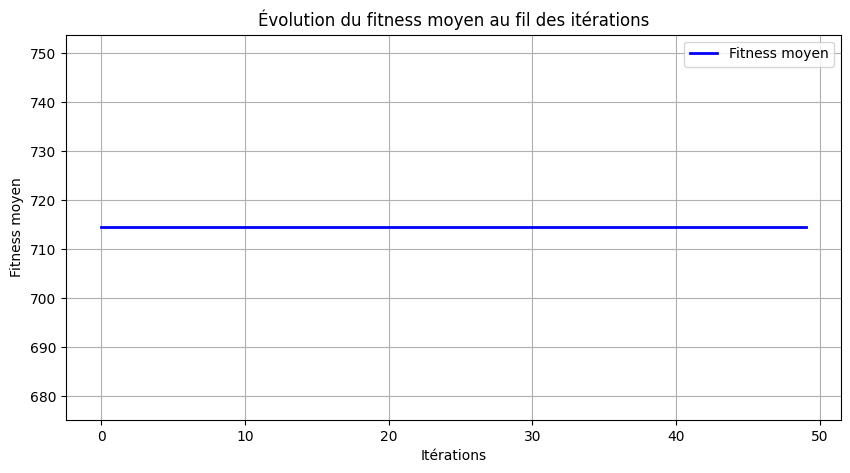

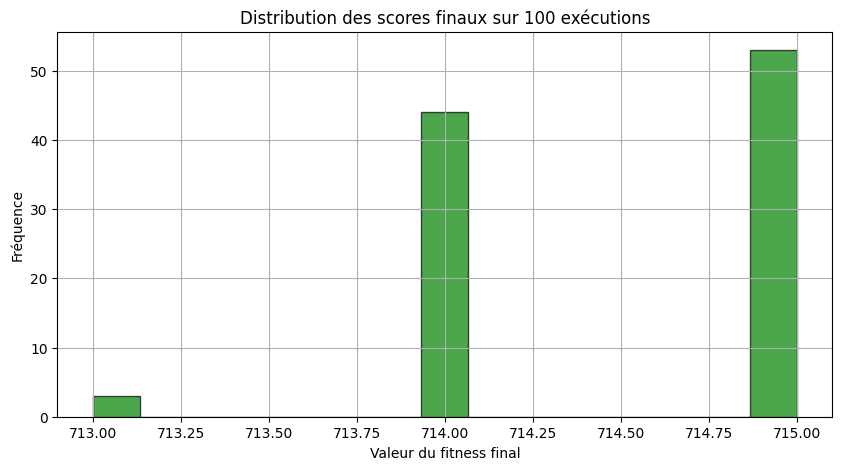

In [9]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt  # 📊 Pour tracer les graphiques

# ================================
# 1️⃣ Lecture du fichier SCP
# ================================
def load_scp_file(filename):
    """
    Charge un fichier SCP et retourne la liste des sous-ensembles.
    """
    with open(filename, "r") as file:
        lines = file.readlines()

    num_elements, num_subsets = map(int, lines[0].split())
    subsets = [set(map(int, line.strip().split())) for line in lines[1:num_subsets+1]]

    return subsets, num_elements

# ================================
# 2️⃣ Classe Particle (Solution MCP)
# ================================
class Particle:
    def __init__(self, num_subsets, k, subsets):
        self.num_subsets = num_subsets
        self.k = k
        self.subsets = subsets
        self.position = self.initialisation_solution()
        self.velocity = []
        self.best_position = self.position.copy()
        self.best_score = float('-inf')

    def initialisation_solution(self):
        solution = [0] * self.num_subsets
        indices = random.sample(range(self.num_subsets), self.k)
        for index in indices:
            solution[index] = 1
        return solution

    def update_velocity(self, global_best_position):
        self.velocity = []
        for i in range(len(self.position)):
            if self.position[i] != global_best_position[i]:
                self.velocity.append(i)

    def update_position(self):
        for index in self.velocity:
            self.position[index] = 1 - self.position[index]

        while sum(self.position) > self.k:
            indices_1 = [i for i in range(len(self.position)) if self.position[i] == 1]
            self.position[random.choice(indices_1)] = 0

        while sum(self.position) < self.k:
            indices_0 = [i for i in range(len(self.position)) if self.position[i] == 0]
            self.position[random.choice(indices_0)] = 1

    def fitness(self):
        covered_elements = set()
        for i, selected in enumerate(self.position):
            if selected == 1:
                covered_elements.update(self.subsets[i])
        return len(covered_elements)

# ================================
# 3️⃣ Classe PSO (Optimisation MCP)
# ================================
class PSO:
    def __init__(self, subsets, universe_size, num_particles, k, max_iter):
        self.subsets = subsets
        self.universe_size = universe_size
        self.num_particles = num_particles
        self.k = k
        self.max_iter = max_iter
        self.particles = [Particle(len(subsets), k, subsets) for _ in range(num_particles)]
        self.global_best_position = None
        self.global_best_score = float('-inf')

    def optimize(self):
        start_time = time.time()
        fitness_historique = []

        for iteration in range(self.max_iter):
            for particle in self.particles:
                score = particle.fitness()
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.particles:
                particle.update_velocity(self.global_best_position)
                particle.update_position()

            fitness_historique.append(self.global_best_score)
            print(f"Itération {iteration + 1}/{self.max_iter} - Meilleur score : {self.global_best_score}")

        end_time = time.time()
        execution_time = end_time - start_time

        print("\n=== Optimisation terminée ===")
        print(f"Meilleure sélection de sous-ensembles : {self.global_best_position}")
        print(f"Score final (éléments couverts) : {self.global_best_score}")
        print(f"⏳ Temps d'exécution : {execution_time:.4f} secondes")

        return self.global_best_position, fitness_historique, execution_time

# ================================
# 4️⃣ Expérimentation et Visualisation
# ================================
if __name__ == "__main__":
    filename = "/content/drive/MyDrive/TP MASTER 1 META + AARN/META/PROJET/scpclr13.txt"

    subsets, universe_size = load_scp_file(filename)

    num_particles = 50
    k = int((2/3) * len(subsets))
    max_iterations = 50

    n_experiments = 100
    fitness_results = []
    execution_times = []
    all_fitness_histories = []

    for i in range(n_experiments):
        print(f"Exécution {i+1} / {n_experiments}")

        pso = PSO(subsets=subsets, universe_size=universe_size, num_particles=num_particles, k=k, max_iter=max_iterations)

        best_solution, fitness_history, execution_time = pso.optimize()

        best_fitness = max(fitness_history)
        fitness_results.append(best_fitness)
        execution_times.append(execution_time)
        all_fitness_histories.append(fitness_history)

        print(f"Fitness: {best_fitness}, Temps d'exécution: {execution_time:.4f} sec\n")

    # Calcul des moyennes
    mean_fitness = np.mean(fitness_results)
    mean_execution_time = np.mean(execution_times)

    print("\n=== Résultats finaux après 100 exécutions ===")
    print(f"Moyenne Fitness: {mean_fitness}")
    print(f"Moyenne Temps d'exécution: {mean_execution_time:.4f} sec")

    # 📈 Graphique 1 : Évolution du fitness moyen sur 50 itérations
    moyenne_fitness_par_iteration = np.mean(all_fitness_histories, axis=0)

    plt.figure(figsize=(10, 5))
    plt.plot(moyenne_fitness_par_iteration, label="Fitness moyen", color='blue', linewidth=2)
    plt.xlabel("Itérations")
    plt.ylabel("Fitness moyen")
    plt.title("Évolution du fitness moyen au fil des itérations")
    plt.legend()
    plt.grid()
    plt.show()

    # 📊 Graphique 2 : Distribution des scores sur 100 exécutions
    plt.figure(figsize=(10, 5))
    plt.hist(fitness_results, bins=15, color='green', alpha=0.7, edgecolor='black')
    plt.xlabel("Valeur du fitness final")
    plt.ylabel("Fréquence")
    plt.title("Distribution des scores finaux sur 100 exécutions")
    plt.grid()
    plt.show()
